In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cloth = pd.read_json("cloth_yelp.json", lines=True)
cloth.head(5)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [3]:
cloth['quality'].value_counts()

5.0    29604
4.0    27118
3.0    19526
2.0     5130
1.0     1344
Name: quality, dtype: int64

In [4]:
cloth.shape

(82790, 18)

In [5]:
cloth.isnull().sum()

item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64

In [6]:
cloth=cloth.drop(['item_id','waist'],axis=1)

In [7]:
cloth=cloth.drop(['user_name','user_id','review_summary','review_text'], axis=1)

In [8]:
cloth.head(5)

,size,quality,cup size,hips,bra size,category,bust,height,length,fit,shoe size,shoe width
0,7,5.0,d,38.0,34.0,new,36,5ft 6in,just right,small,NaN,NaN
1,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,just right,small,NaN,NaN
2,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,slightly long,small,9.0,NaN
3,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,just right,fit,NaN,NaN
4,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,slightly long,small,NaN,NaN


In [9]:
new_cloth = cloth.dropna(how='any')

In [10]:
new_cloth.shape

(7000, 12)

In [11]:
new_cloth['cup size'].value_counts()

c         1670
d         1419
b         1325
dd/e      1031
ddd/f      612
a          453
dddd/g     263
h           89
k           40
j           35
aa          34
i           29
Name: cup size, dtype: int64

In [12]:
new_cloth['category'].value_counts()

new          1775
tops         1754
bottoms      1442
dresses      1410
outerwear     367
sale          242
wedding        10
Name: category, dtype: int64

In [13]:
new_cloth['fit'].value_counts()

fit      4798
large    1161
small    1041
Name: fit, dtype: int64

In [14]:
new_cloth['length'].value_counts()

just right        5231
slightly long     1012
slightly short     510
very long          197
very short          50
Name: length, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [17]:
name_list = ['cup size','category','length','fit','shoe width']

for name in name_list:
    new_cloth[name] = label_encoded(new_cloth[name])
    
new_cloth.head(3)

cup size ['a' 'aa' 'b' 'c' 'd' 'dd/e' 'ddd/f' 'dddd/g' 'h' 'i' 'j' 'k']
category ['bottoms' 'dresses' 'new' 'outerwear' 'sale' 'tops' 'wedding']
length ['just right' 'slightly long' 'slightly short' 'very long' 'very short']
fit ['fit' 'large' 'small']
shoe width ['average' 'narrow' 'wide']


C:\Users\AJAY\AppData\Local\Temp/ipykernel_10968/53516874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cloth[name] = label_encoded(new_cloth[name])


,size,quality,cup size,hips,bra size,category,bust,height,length,fit,shoe size,shoe width
23,5,5.0,3,32.0,34.0,2,34,5ft 1in,0,2,7.0,0
40,18,5.0,6,44.0,38.0,2,43,5ft 4in,0,2,8.5,0
49,11,5.0,3,37.0,36.0,2,35,5ft 2in,1,2,6.0,0


In [18]:
cloths = new_cloth.copy()

In [19]:
cloths.head(10)

,size,quality,cup size,hips,bra size,category,bust,height,length,fit,shoe size,shoe width
23,5,5.0,3,32.0,34.0,2,34,5ft 1in,0,2,7.0,0
40,18,5.0,6,44.0,38.0,2,43,5ft 4in,0,2,8.5,0
49,11,5.0,3,37.0,36.0,2,35,5ft 2in,1,2,6.0,0
65,9,5.0,3,42.0,38.0,2,38,5ft 2in,2,0,7.0,0
100,20,3.0,3,45.0,40.0,2,38,5ft 7in,0,0,10.0,0
142,15,4.0,5,46.0,36.0,2,40,5ft 6in,0,0,7.5,0
154,20,2.0,3,53.0,40.0,2,43,5ft 3in,0,2,8.0,0
160,15,4.0,3,45.0,38.0,2,36,5ft 8in,0,0,10.5,0
185,8,4.0,5,40.0,32.0,2,36,5ft 9in,2,0,9.0,0
250,7,5.0,5,35.0,34.0,2,36,5ft 3in,0,1,7.5,0


In [20]:
cloths['bust'].isnull().sum()

0

In [21]:
def ref1(x):
    vari = np.nan
    try:
        vari = float(x)
    except:
        vari = np.nan
    return vari

cloths['bust'] = cloths['bust'].map(ref1)

In [22]:
cloths['bust'].isnull().sum()

1

In [23]:
cloths = cloths.dropna(how='any')

In [24]:
import re
list1 = cloths['height'][:5].to_list()
print(list1)
k = []
p='[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+'
if re.search(p,list1[0]) is not None:
    for catch in re.finditer(p,list1[0]):
        k.append(int(catch[0]))
k

['5ft 1in', '5ft 4in', '5ft 2in', '5ft 2in', '5ft 7in']


[5, 1]

In [25]:
height_list = cloths['height'].to_list()
updated=[]

def extractsize(x):
    numbers=[]
    p='[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+'
    if re.search(p,x) is not None:
        for catch in re.finditer(p,x):
            numbers.append(int(catch[0]))
    if len(numbers) == 2:
        fina = numbers[1]+numbers[0]*12
    elif len(numbers)==1:
        fina=numbers[0]*12
    else:
        fina = np.nan
    return fina

for height in height_list:
    updated.append(extractsize(height))
cloths['Height_inches'] = updated

In [26]:
cloths.head(5)

,size,quality,cup size,hips,bra size,category,bust,height,length,fit,shoe size,shoe width,Height_inches
23,5,5.0,3,32.0,34.0,2,34.0,5ft 1in,0,2,7.0,0,61
40,18,5.0,6,44.0,38.0,2,43.0,5ft 4in,0,2,8.5,0,64
49,11,5.0,3,37.0,36.0,2,35.0,5ft 2in,1,2,6.0,0,62
65,9,5.0,3,42.0,38.0,2,38.0,5ft 2in,2,0,7.0,0,62
100,20,3.0,3,45.0,40.0,2,38.0,5ft 7in,0,0,10.0,0,67


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size'>

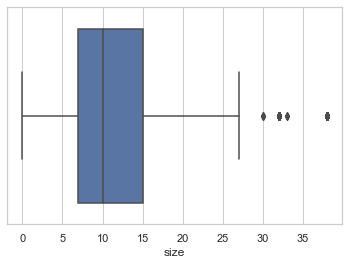

In [27]:
sns.set_theme(style='whitegrid')
sns.boxplot(cloths['size'])

In [28]:
cloths=cloths[cloths['size']<23]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size'>

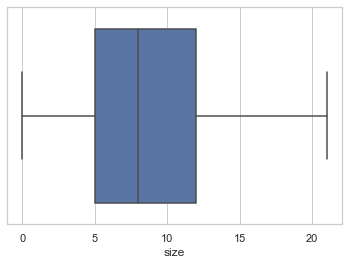

In [29]:
sns.set_theme(style='whitegrid')
sns.boxplot(cloths['size'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height_inches'>

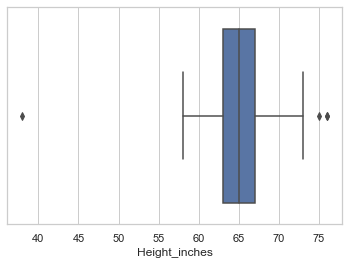

In [30]:
sns.set_theme(style='whitegrid')
sns.boxplot(cloths['Height_inches'])

In [31]:
cloths = cloths[cloths['Height_inches']<74]
cloths = cloths[cloths['Height_inches']>57]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height_inches'>

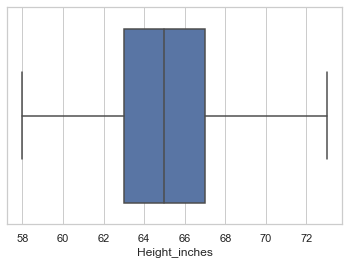

In [32]:
sns.set_theme(style='whitegrid')
sns.boxplot(cloths['Height_inches'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hips'>

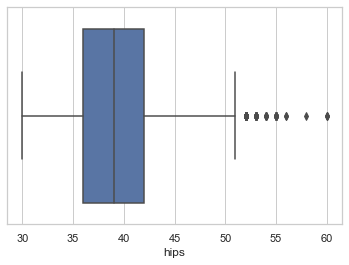

In [33]:
sns.set_theme(style='whitegrid')
sns.boxplot(cloths['hips'])

In [34]:
cloths = cloths[cloths['hips']<53]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hips'>

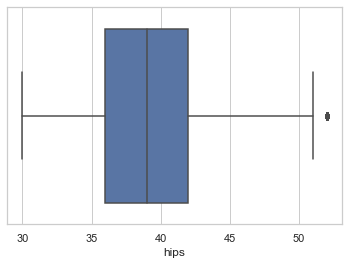

In [35]:
sns.set_theme(style='whitegrid')
sns.boxplot(cloths['hips'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bra size'>

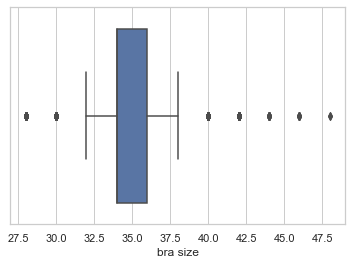

In [36]:
sns.set_theme(style='whitegrid')
sns.boxplot(cloths['bra size'])

In [37]:
cloths = cloths[cloths['bra size']>30]
cloths = cloths[cloths['bra size']<40]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bra size'>

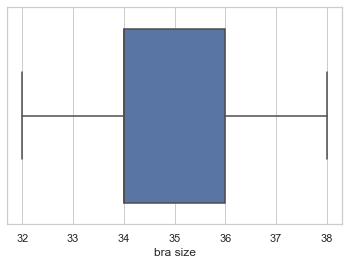

In [38]:
sns.set_theme(style='whitegrid')
sns.boxplot(cloths['bra size'])

In [39]:
cloths = cloths[cloths['bust']>24]
cloths = cloths[cloths['bust']<48]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bust'>

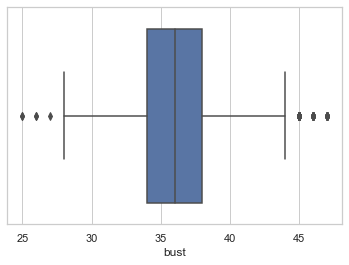

In [40]:
sns.set_theme(style='whitegrid')
sns.boxplot(cloths['bust'])

In [41]:
cloths.shape

(5739, 13)

<AxesSubplot:>

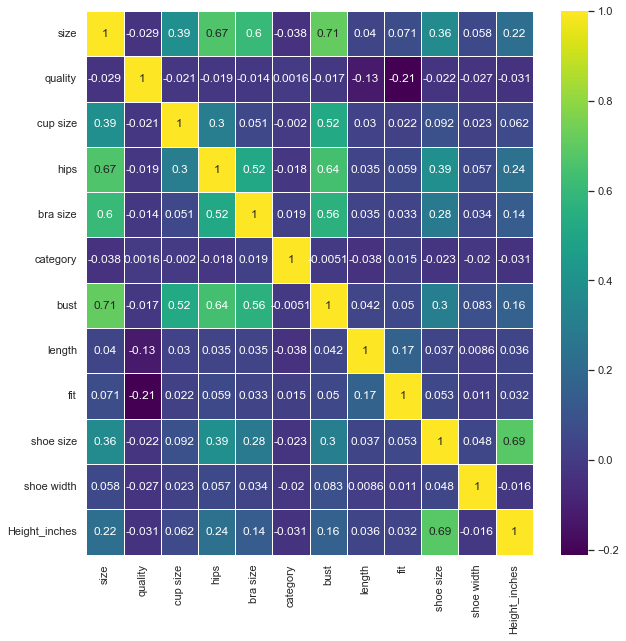

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(cloths.corr(),annot=True,cmap='viridis',linewidths=.5)

In [43]:
X = cloths['quality']
y = cloths.drop(['quality','height','hips','bust'],axis=1)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [46]:
rfc=RandomForestClassifier(n_estimators=250,n_jobs=-1)

In [47]:
rfc.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[5. 5. 5. ... 5. 4. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [48]:
random_model_accuracy = round(rfc.score(X_train,y_train)*100,2)
print(round(random_model_accuracy1,2),'%')

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.